# Vegetable and Fruits Price Analysis

This mini-project intends to focus on the historical data of fruit and vegetable prices in Nepal between 2013 and 2021. The main focus is to employ a standard exploratory analysis and additionally explore machine learning forecasting. This is intended as practice and such forecasting is useful in the aid of future pricing, price trends, seasonality, anomalies and potential pricing strategies that can benefit agricultural workers and buyers.

The agriculture industry is an inherently complex and dynamic environment wherein forecasting future prices, production etc, is important for optimal decision making and resource allocation in the interest of optimal growth.
The complexity in trying to predict the prices of fruit vegetables is a complex task due to the sensitivity of price to the likes of crop yield, climate, global markets and production.

In [1]:
import numpy as np
import math
import os, pathlib

import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
sns.set()

In [2]:
dataframe = pd.read_csv("kalimati_tarkari_dataset.csv")

dataframe.head(15)


,SN,Commodity,Date,Unit,Minimum,Maximum,Average
0,0,Tomato Big(Nepali),2013-06-16,Kg,35.0,40.0,37.5
1,1,Tomato Small(Local),2013-06-16,Kg,26.0,32.0,29.0
2,2,Potato Red,2013-06-16,Kg,20.0,21.0,20.5
3,3,Potato White,2013-06-16,Kg,15.0,16.0,15.5
4,4,Onion Dry (Indian),2013-06-16,Kg,28.0,30.0,29.0
5,5,Carrot(Local),2013-06-16,Kg,30.0,35.0,32.5
6,6,Cabbage(Local),2013-06-16,Kg,6.0,10.0,8.0
7,7,Cauli Local,2013-06-16,Kg,30.0,35.0,32.5
8,8,Raddish Red,2013-06-16,Kg,35.0,40.0,37.5
9,9,Raddish White(Local),2013-06-16,Kg,25.0,30.0,27.5


Since the datetime column is of type object, first we should cast this to the DateTime format and set it as the index for our dataseries

In [3]:
dataframe["Date"] = pd.to_datetime(dataframe["Date"])
dataframe = dataframe.set_index("Date")

In [4]:
#Display the info on the dataset
dataframe.info()

#Get measures of any missing values
dataframe.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 197161 entries, 2013-06-16 to 2021-05-13
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   SN         197161 non-null  int64  
 1   Commodity  197161 non-null  object 
 2   Unit       197161 non-null  object 
 3   Minimum    197161 non-null  float64
 4   Maximum    197161 non-null  float64
 5   Average    197161 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 10.5+ MB


SN           0
Commodity    0
Unit         0
Minimum      0
Maximum      0
Average      0
dtype: int64

Notice that in the head block above, there seems to be two different kinds of "Kg" listed. To simplify, set the capitalised "KG" to standard "Kg"

In [5]:
print(dataframe.Unit.unique())

dataframe.query("Unit == 'KG'")["Unit"] = "Kg"
dataframe["Commodity"] = dataframe["Commodity"].astype(str)

['Kg' 'Doz' '1 Pc' 'KG']


C:\Users\MMCCO\AppData\Local\Temp\ipykernel_37956\774622723.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.query("Unit == 'KG'")["Unit"] = "Kg"


In [6]:
print(dataframe.describe().T)

commodity_nunique = dataframe["Commodity"].nunique()
top_commodities = dataframe['Commodity'].value_counts().nlargest(10).index.tolist()

print(f"\nNumber of unique commodities : {commodity_nunique}")
print(f"\nTop 10 largest commodities:  {top_commodities}")

print("\n")
print(dataframe['Commodity'].value_counts())



            count          mean           std  min      25%      50%  \
SN       197161.0  98580.000000  56915.622549  0.0  49290.0  98580.0   
Minimum  197161.0     85.423938     77.058896  1.0     40.0     60.0   
Maximum  197161.0     94.161284     82.375858  6.0     45.0     70.0   
Average  197161.0     89.792611     79.619003  5.0     42.5     65.0   

              75%       max  
SN       147870.0  197160.0  
Minimum     100.0    1800.0  
Maximum     110.0    2000.0  
Average     105.0    1900.0  

Number of unique commodities : 132

Top 10 largest commodities:  ['Ginger', 'Cauli Local', 'Cabbage(Local)', 'Chilli Dry', 'Raddish White(Local)', 'Potato Red', 'Bamboo Shoot', 'Banana', 'Brd Leaf Mustard', 'Onion Dry (Indian)']


Commodity
Ginger                  2751
Cauli Local             2750
Cabbage(Local)          2749
Chilli Dry              2748
Raddish White(Local)    2747
                        ... 
Maize                     24
Mango(Calcutte)           23
Sweet Lime     

In [11]:
def plot_n_commodities(dataframe, n=10, m=0):
   
   unique_commodities = dataframe["Commodity"].unique()[0:n]
   top_commodities = dataframe['Commodity'].value_counts().nlargest(n).index.tolist()


   dataframe_comm = dataframe[dataframe["Commodity"] == top_commodities[m]]

   first_date = dataframe_comm.index.min().strftime('%Y-%m-%d')
   last_date = dataframe_comm.index.max().strftime('%Y-%m-%d')

   date_range = f"{first_date} to {last_date}"
   commodity = top_commodities[m]

   plt.figure(figsize=(12,8))
   plt.plot(dataframe_comm["Minimum"], label = "Minimum")
   plt.plot(dataframe_comm["Average"], label = "Average")
   plt.plot(dataframe_comm["Maximum"], label = "Maximum")

   plt.ylabel("Units value")
   plt.xlabel("Datetime")
   plt.legend()
   plt.title(f"Commodity : {commodity} \n {date_range}", fontsize=15)



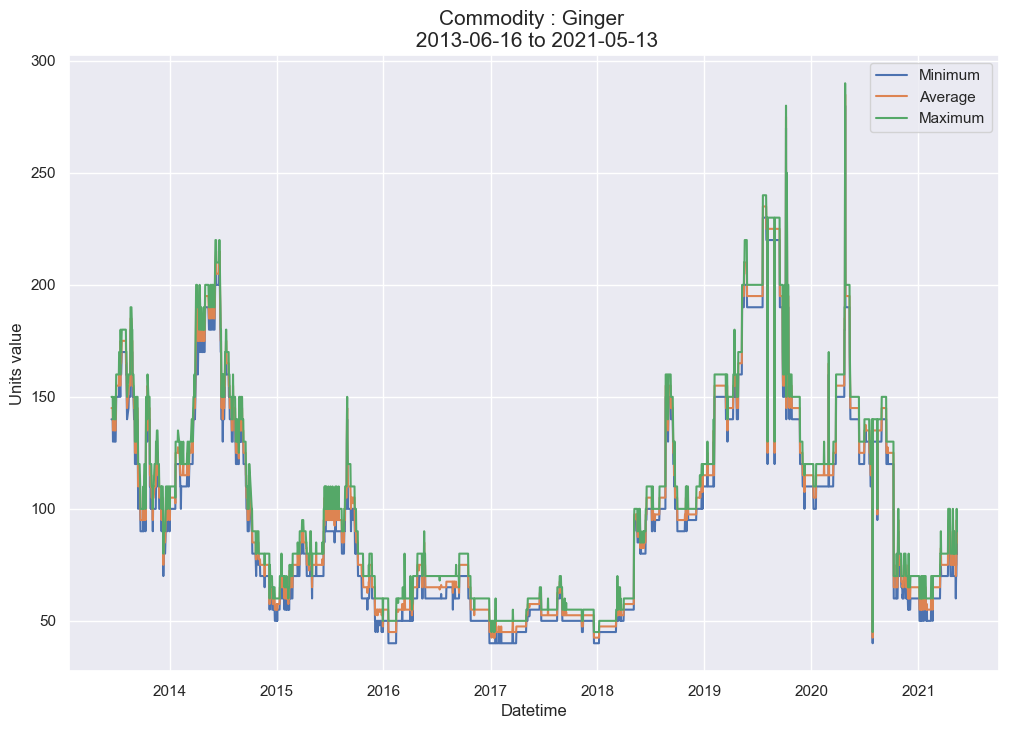

In [12]:
plot_n_commodities(dataframe, 4)
